<a href="https://colab.research.google.com/github/SeohyunLyoo/handson-ml3/blob/main/10_02_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [29]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
data = keras.datasets.fashion_mnist.load_data()

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [15]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [16]:
X_train, X_val, X_test = X_train / 255., X_val / 255., X_test / 255.

In [17]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('float64'))

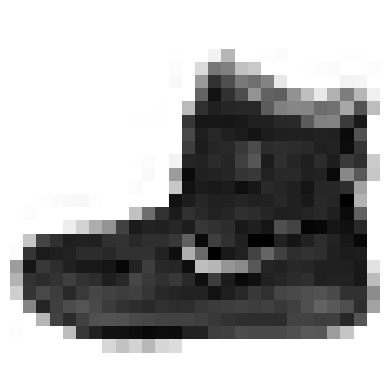

In [21]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
class_names[y_train[0]], y_train[0]

('Ankle boot', 9)

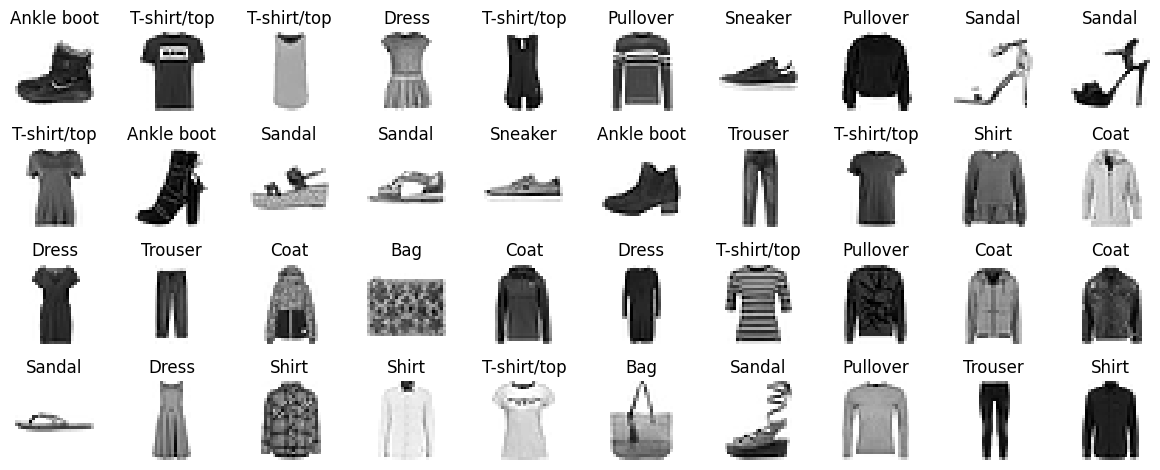

In [30]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [34]:
tf.random.set_seed(42)
model = keras.Sequential()

model.add(keras.layers.Input(shape=[28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
tf.random.set_seed(42)
model = keras.Sequential(
    [
        keras.layers.Input(shape=[28,28]),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [45]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [46]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03098005,  0.012812  , -0.03300578, ...,  0.05690828,
        -0.06196946,  0.0219679 ],
       [ 0.05733705, -0.01138563, -0.0325767 , ...,  0.02780621,
        -0.06264544, -0.06664667],
       [-0.02809046,  0.01378176,  0.04683246, ...,  0.07046305,
        -0.0504958 , -0.00242771],
       ...,
       [-0.06121241,  0.0597347 , -0.01134861, ...,  0.05010758,
        -0.03665733,  0.07344486],
       [ 0.00466699,  0.03661592, -0.03373908, ..., -0.05970255,
         0.01028238,  0.03688812],
       [ 0.02366302, -0.00155919, -0.04643673, ..., -0.06143649,
         0.04141441, -0.01961044]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
biases.shape

(300,)

In [54]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6854 - loss: 1.0074 - val_accuracy: 0.8290 - val_loss: 0.5038
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8256 - loss: 0.5067 - val_accuracy: 0.8358 - val_loss: 0.4558
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8430 - loss: 0.4529 - val_accuracy: 0.8426 - val_loss: 0.4319
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8528 - loss: 0.4221 - val_accuracy: 0.8490 - val_loss: 0.4176
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8598 - loss: 0.4003 - val_accuracy: 0.8552 - val_loss: 0.4047
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8646 - loss: 0.3835 - val_accuracy: 0.8582 - val_loss: 0.3939
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8690 - loss: 0.3696 - val_accuracy: 0.8604 - val_loss: 0.3865
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8736 - loss: 0.357

In [57]:
history.history['loss']

[0.7183355093002319,
 0.48726049065589905,
 0.44189414381980896,
 0.41413313150405884,
 0.3940083086490631,
 0.3780587613582611,
 0.364780992269516,
 0.35318154096603394,
 0.34280112385749817,
 0.3332957327365875,
 0.32457777857780457,
 0.3165919780731201,
 0.3090206980705261,
 0.30200710892677307,
 0.29543474316596985,
 0.2892731726169586,
 0.2832464873790741,
 0.27760136127471924,
 0.2722497582435608,
 0.26703909039497375,
 0.2620035409927368,
 0.25708383321762085,
 0.2524758577346802,
 0.24802035093307495,
 0.24367152154445648,
 0.23951642215251923,
 0.23517292737960815,
 0.2312818020582199,
 0.22744406759738922,
 0.22357092797756195]

<Axes: xlabel='Epoch'>

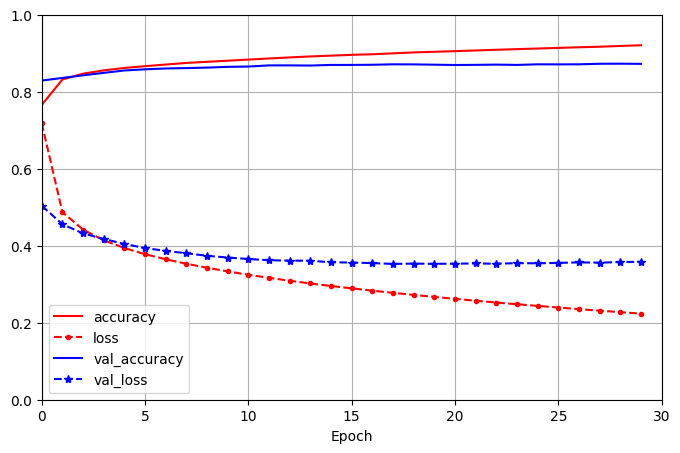

In [68]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,30], ylim=[0,1], grid=True, xlabel='Epoch', style=['r-', 'r--.', 'b-', 'b--*']
)

In [69]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.3617


[0.36245155334472656, 0.8744999766349792]

In [71]:
X_new = X_test[:3]
y_proba = model.predict([X_new])
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.01, 0.  , 0.76],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [73]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [76]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [79]:
data1 = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(data1.data, data1.target, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, random_state=42)

In [83]:
X_train.shape, X_train[0], y_train.shape, y_train[0], X_train.shape[1:]

((11610, 8),
 array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
         1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02]),
 (11610,),
 1.442,
 (8,))

In [93]:
tf.random.set_seed(42)

norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model2 = keras.Sequential(
    [
        norm_layer,
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1)
    ]
)

model2.compile(optimizer=optimizer, loss='mse', metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
hisory2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.1987 - loss: 1.5439 - val_RootMeanSquaredError: 0.6166 - val_loss: 0.3802
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6344 - loss: 0.4029 - val_RootMeanSquaredError: 0.8905 - val_loss: 0.7931
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6076 - loss: 0.3695 - val_RootMeanSquaredError: 0.6076 - val_loss: 0.3691
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5928 - loss: 0.3516 - val_RootMeanSquaredError: 1.1617 - val_loss: 1.3496
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5849 - loss: 0.3424 - val_RootMeanSquaredError: 0.8352 - val_loss: 0.6976
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5751 - loss: 0.3310 - val_RootMeanSquaredError: 0.6403 - val_loss: 0.4099
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5685 - loss: 0.3234 -

In [94]:
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_9 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [95]:
mse_test, rmse_test = model2.evaluate(X_test, y_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.8800 - loss: 0.8029


In [96]:
mse_test, rmse_test

(0.8598520159721375, 0.9272820353507996)

In [97]:
X_new = X_test[:3]
y_pred = model2.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[1.4744991],
       [1.9039165],
       [1.3127396]], dtype=float32)

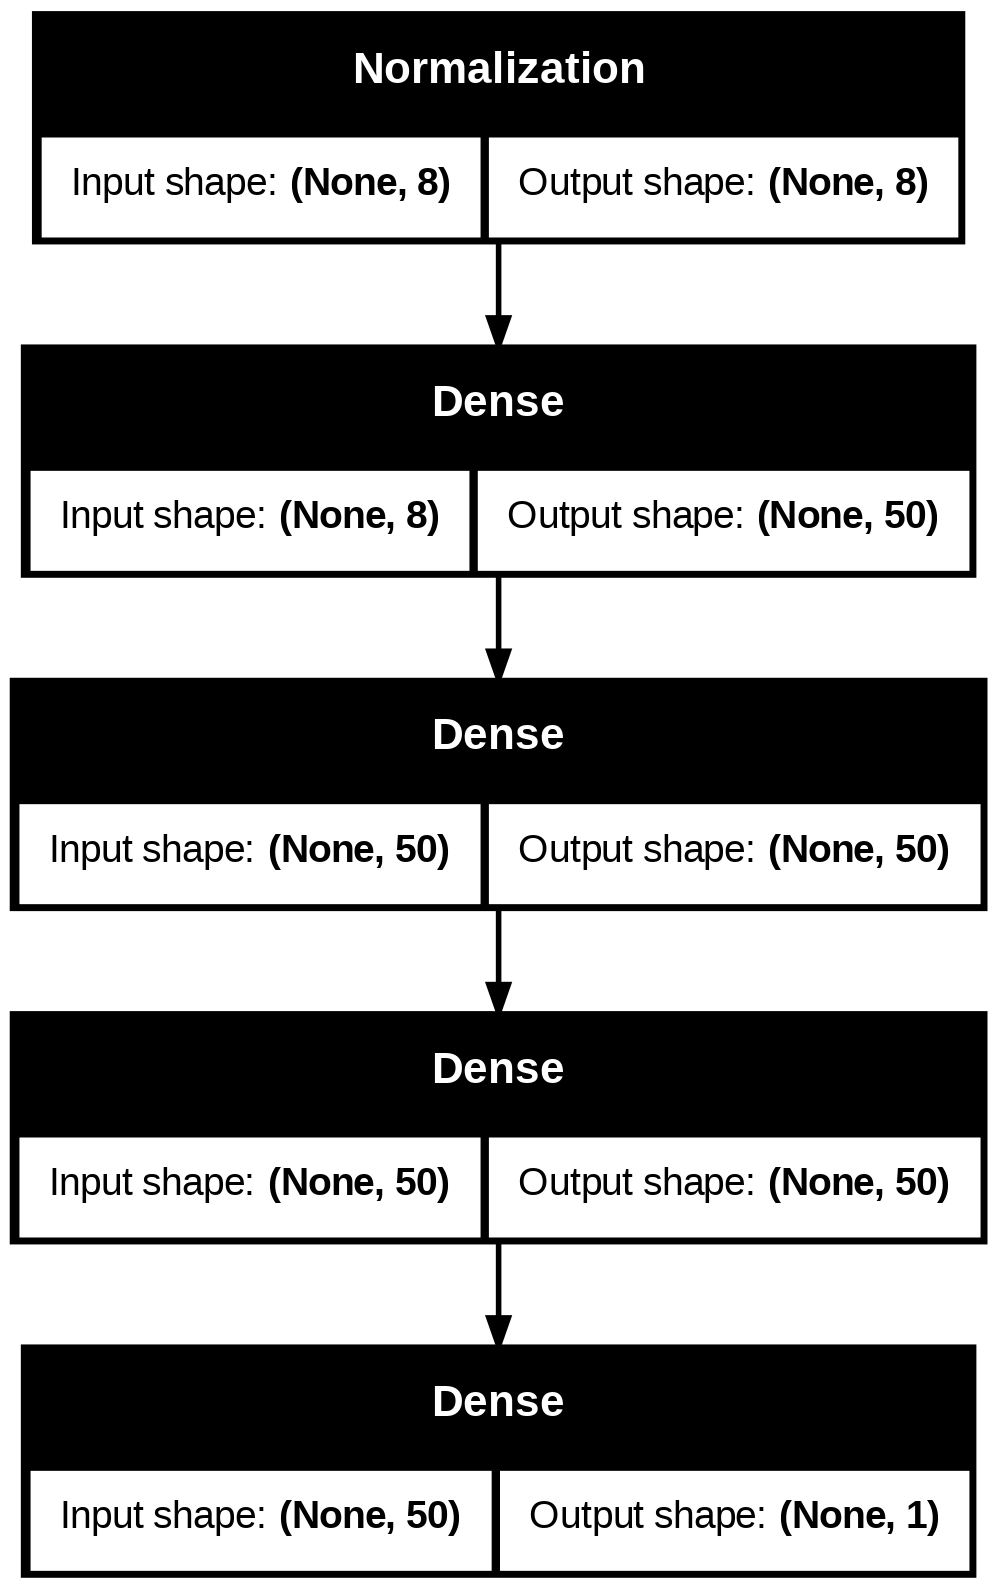

In [100]:
tf.keras.utils.plot_model(model2, "housing_model.png", show_shapes=True)